In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

%matplotlib inline

import xgboost

In [2]:
hist_data = pd.read_csv('historical_user_logs.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [45]:
train_data.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [57]:
gender_null = train_data[train_data['gender'].isnull()]['user_id'].unique()

In [58]:
gender_notnull = train_data[train_data['gender'].notnull()]['user_id'].unique()

In [64]:
i=0
j=0
for usr in gender_null:
    if usr in gender_notnull:
        i += 1
    else:
        j += 1
        
i, j

(0, 6510)

In [65]:
train_data[train_data['gender'].isnull()]

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
8,390699,2017-07-02 00:02,611906,H,105960,11085,5,270915.0,NaN,NaN,NaN,NaN,NaN,0,0
104,494858,2017-07-02 00:12,51597,H,359520,13787,3,NaN,NaN,NaN,NaN,NaN,NaN,0,0
119,103188,2017-07-02 00:14,172910,C,405490,60305,3,NaN,NaN,NaN,NaN,NaN,NaN,0,1
133,428248,2017-07-02 00:16,172910,H,404347,53587,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
136,4971,2017-07-02 00:17,172910,I,404347,53587,1,146115.0,NaN,NaN,NaN,NaN,NaN,0,0
145,245224,2017-07-02 00:18,172910,D,404347,53587,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
146,8511,2017-07-02 00:18,172910,B,404347,53587,1,372532.0,NaN,NaN,NaN,NaN,NaN,0,0
169,4580,2017-07-02 00:23,1048963,I,404347,53587,1,146115.0,NaN,NaN,NaN,NaN,NaN,1,0
201,7198,2017-07-02 00:26,172910,H,404347,53587,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
216,4901,2017-07-02 00:28,877548,I,404347,53587,1,146115.0,NaN,NaN,NaN,NaN,NaN,0,0


Checking the correlation between gender and Product

In [115]:
df = train_data[train_data['gender'].notnull()][['gender', 'product']]

In [116]:
df.head()

,gender,product
0,Female,C
1,Female,C
2,Female,C
3,Male,I
4,Male,C


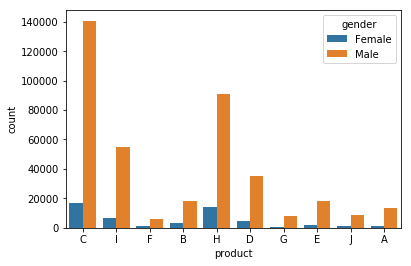

In [117]:
sns.countplot(df['product'], hue=df['gender'])

In [4]:
train_data['user_group_id'].unique()

array([10.,  8.,  3.,  2.,  1.,  9.,  4., nan, 11.,  7.,  5., 12.,  6.,
        0.])

In [12]:
train_data[train_data['user_group_id'] == 10.0].nunique()

session_id                13779
DateTime                   5523
user_id                    4506
product                      10
campaign_id                  10
webpage_id                    9
product_category_1            5
product_category_2            9
user_group_id                 1
gender                        1
age_level                     1
user_depth                    3
city_development_index        4
var_1                         2
is_click                      2
dtype: int64

In [43]:
train_data[train_data['user_group_id'].isnull()].isnull().sum()

session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        14475
user_group_id             18243
gender                    18243
age_level                 18243
user_depth                18243
city_development_index    18243
var_1                         0
is_click                      0
dtype: int64

In [22]:
train_data[train_data['user_group_id'] == 10.0][['gender','age_level']].drop_duplicates()

,gender,age_level
0,Female,4.0


In [39]:
train_data[(train_data['gender'] == 'Female') &  (train_data['age_level'] == 4.0)].isnull().sum()

session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        10615
user_group_id                 0
gender                        0
age_level                     0
user_depth                    0
city_development_index     2632
var_1                         0
is_click                      0
dtype: int64

Got nowhere in trying to fill up the missing values so we're going to try dropping the rows with missing values for columns:
<br>user_group_id
<br>gender
<br>age_level

In [145]:
df = train_data[np.isfinite(train_data['user_group_id'])]

In [146]:
df.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        351379
user_group_id                  0
gender                         0
age_level                      0
user_depth                     0
city_development_index    106886
var_1                          0
is_click                       0
dtype: int64

Now we drop only a few columns and run our xgboost model again
<br>COlumns that we drop:
<br>product_category_2
<br>city_development_index

In [147]:
df = df.drop(['session_id', 'DateTime', 'product_category_2', 'city_development_index'], axis=1)

In [148]:
df = pd.get_dummies(df, drop_first=True)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000028203757940>>
Traceback (most recent call last):
  File "C:\Users\Anagha Rumade\Anaconda3\lib\site-packages\xgboost\core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [149]:
df.columns

Index(['user_id', 'campaign_id', 'webpage_id', 'product_category_1',
       'user_group_id', 'age_level', 'user_depth', 'var_1', 'is_click',
       'product_B', 'product_C', 'product_D', 'product_E', 'product_F',
       'product_G', 'product_H', 'product_I', 'product_J', 'gender_Male'],
      dtype='object')

In [150]:
xgb = xgboost.XGBClassifier()

In [151]:
xgb.fit(df.loc[:, df.columns != 'is_click'], df['is_click'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [154]:
test_data.isnull().sum()

session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64

In [155]:
df_test = test_data.drop(['session_id','DateTime', 'product_category_2', 'city_development_index'], axis=1)

In [156]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [158]:
y_pred = xgb.predict_proba(df_test)

In [159]:
y_pred

array([[0.9080103 , 0.0919897 ],
       [0.931273  , 0.06872699],
       [0.9323781 , 0.06762189],
       ...,
       [0.9457816 , 0.05421841],
       [0.9357868 , 0.06421324],
       [0.9285382 , 0.07146181]], dtype=float32)

In [160]:
submission = pd.DataFrame()
submission['session_id'] = test_data['session_id']
submission['is_click'] = y_pred[:,1]

In [161]:
submission.to_csv('submission_01.csv', index=False)

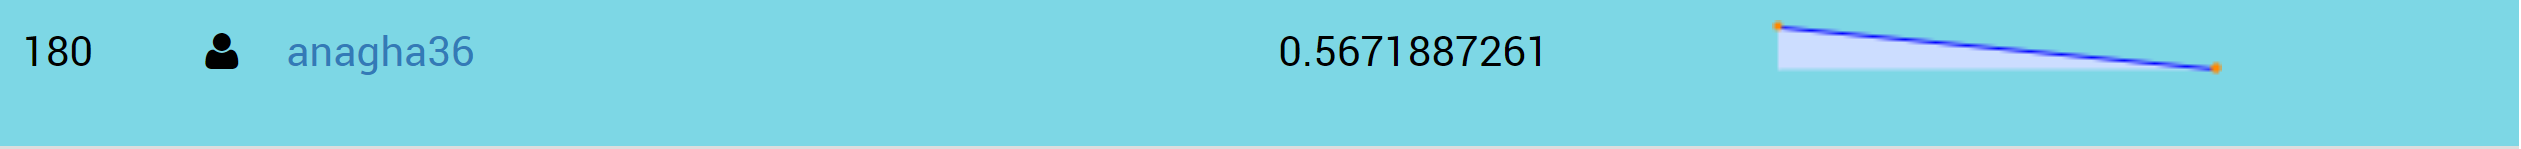

Add Date and Time Seperately